# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io

#Importing Data Sets


Build an ML model for IBM stock prices, predicting daily  closing prices.

Get the dataset from  [Yahoo Finance](https://finance.yahoo.com/quote/I/history?p=I) and download data between the dates 2015-Jan-01 to 2018-Mar-31.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IBM.csv to IBM.csv


In [ ]:
IBM = pd.read_csv(io.BytesIO(uploaded['IBM.csv']), index_col = 'Date', parse_dates = True)
IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,92.860001,93.050003,91.199997,91.550003,61.160595,5327800
2004-01-05,92.000000,93.089996,92.000000,93.050003,62.162693,5276300
2004-01-06,92.199997,93.190002,92.139999,93.059998,62.169365,4380000
2004-01-07,93.139999,93.379997,92.470001,92.779999,61.982319,4927600
2004-01-08,93.209999,93.209999,92.029999,93.040001,62.156013,6179800


Importing the plotly.graph_objects packets to visualize the IBM stock data.

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(
                x=IBM.index,
                open=IBM['Open'],
                high=IBM['High'],
                low=IBM['Low'],
                close=IBM['Close'])])
fig.show()

To avoid errors of whereby pandas are not sure that the IBM dataframe was copied or changed I use .copy(), alot throughout the notebook.

In [ ]:
data = IBM.loc['2015-01-01':'2018-03-31'].copy()

Calculating the daily returns of each trading day

In [ ]:
today_price = data.loc[:,'Adj Close'][1:].copy()
yesterday_price = data.loc[:,'Adj Close'][:-1].copy()

data['Daily_returns'] = today_price / yesterday_price.values - 1
data.loc['2015-01-02', 'Daily_returns'] = 0
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2015-01-02,161.309998,163.309998,161.000000,162.059998,129.241516,5525500,0.000000
2015-01-05,161.270004,161.270004,159.190002,159.509995,127.207932,4880400,-0.015735
2015-01-06,159.669998,159.960007,155.169998,156.070007,124.464600,6146700,-0.021566
2015-01-07,157.199997,157.199997,154.029999,155.050003,123.651100,4701800,-0.006536
2015-01-08,156.240005,159.039993,155.550003,158.419998,126.338654,4236800,0.021735


# Feature Engineering

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


--2020-05-16 05:45:58--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-05-16 05:45:58--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-05-16 05:45:58--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.so

In [ ]:
import talib as ta

##Bollinger Bands

In [ ]:
data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Close'], timeperiod =5)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band
Date,,,,,,,,,,
2015-01-02,161.309998,163.309998,161.000000,162.059998,129.241516,5525500,0.000000,NaN,NaN,NaN
2015-01-05,161.270004,161.270004,159.190002,159.509995,127.207932,4880400,-0.015735,NaN,NaN,NaN
2015-01-06,159.669998,159.960007,155.169998,156.070007,124.464600,6146700,-0.021566,NaN,NaN,NaN
2015-01-07,157.199997,157.199997,154.029999,155.050003,123.651100,4701800,-0.006536,NaN,NaN,NaN
2015-01-08,156.240005,159.039993,155.550003,158.419998,126.338654,4236800,0.021735,163.21167,158.222,153.232331


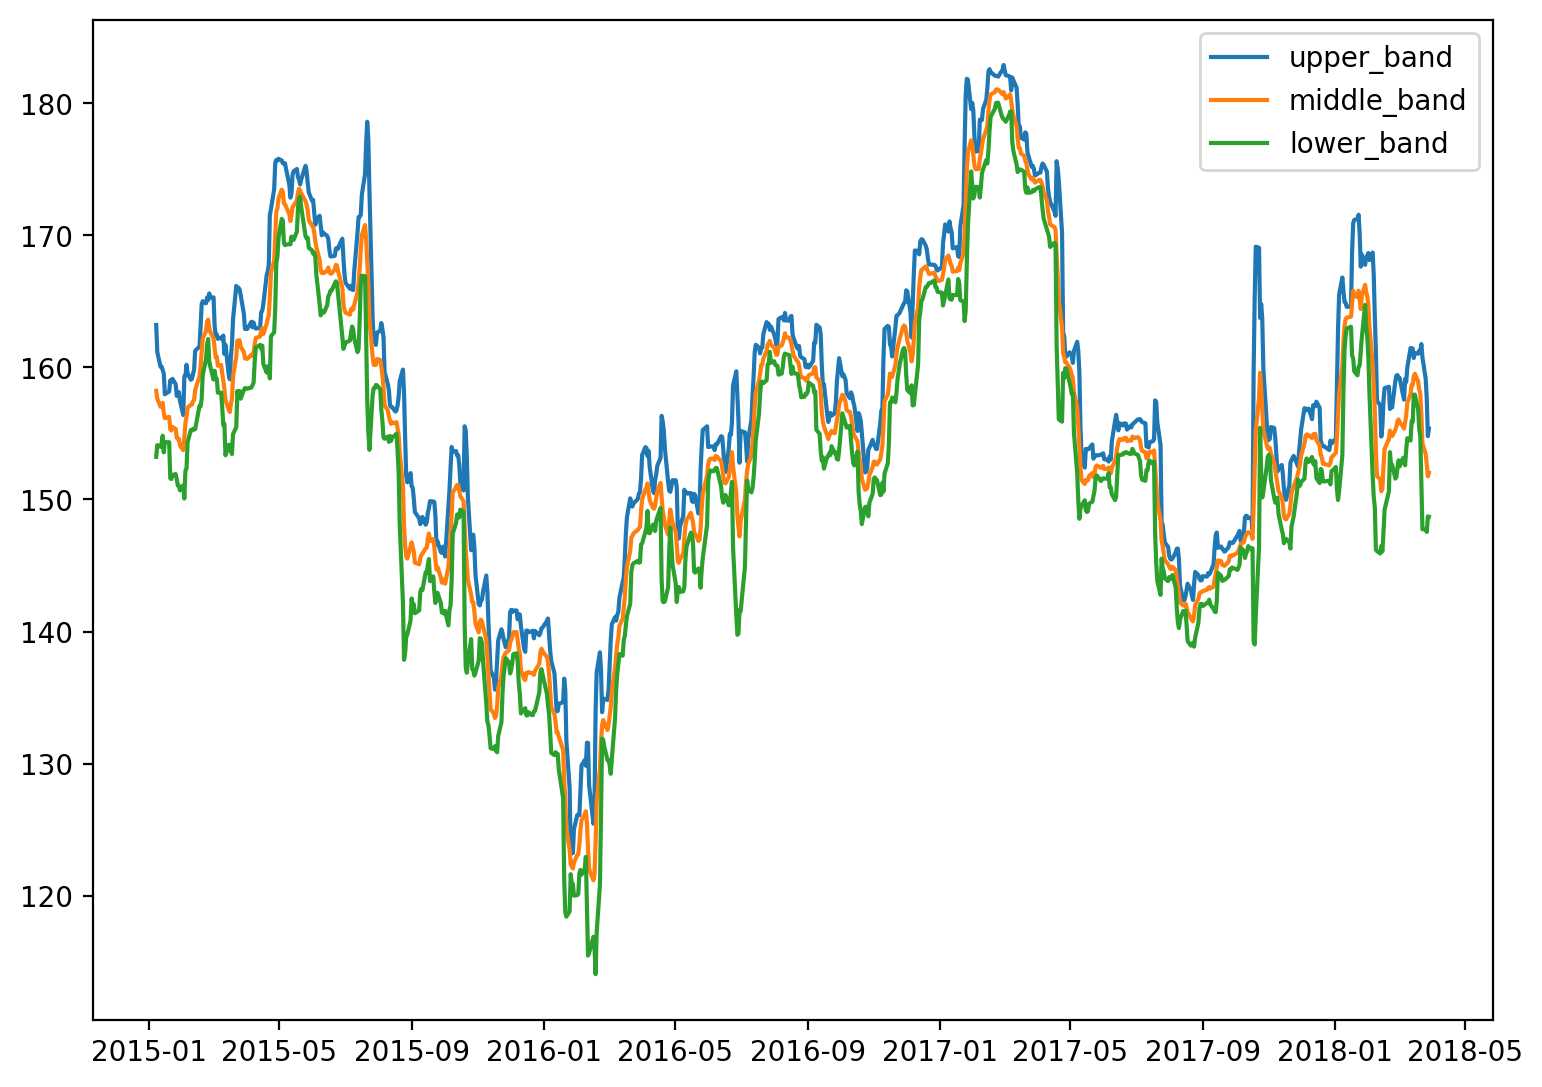

In [ ]:
fig2 = plt.figure(figsize=(7,5),dpi =200)

ax = fig2.add_axes([0,0,1,1])

ax.plot(data.index,data['upper_band'] , label="upper_band",)
ax.plot(data.index,data['middle_band'] , label="middle_band")
ax.plot(data.index,data['lower_band'] , label="lower_band")
ax.legend()

##Simple Moving Average




In [ ]:
data['SMA'] = ta.SMA(data['Close'],7)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band,SMA
Date,,,,,,,,,,,
2015-01-02,161.309998,163.309998,161.000000,162.059998,129.241516,5525500,0.000000,NaN,NaN,NaN,NaN
2015-01-05,161.270004,161.270004,159.190002,159.509995,127.207932,4880400,-0.015735,NaN,NaN,NaN,NaN
2015-01-06,159.669998,159.960007,155.169998,156.070007,124.464600,6146700,-0.021566,NaN,NaN,NaN,NaN
2015-01-07,157.199997,157.199997,154.029999,155.050003,123.651100,4701800,-0.006536,NaN,NaN,NaN,NaN
2015-01-08,156.240005,159.039993,155.550003,158.419998,126.338654,4236800,0.021735,163.21167,158.222,153.232331,NaN


##Exponential Moving Averages

In [ ]:
data['EMA'] = ta.EMA(data['Close'], timeperiod = 2)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band,SMA,EMA
Date,,,,,,,,,,,,
2015-01-02,161.309998,163.309998,161.000000,162.059998,129.241516,5525500,0.000000,NaN,NaN,NaN,NaN,NaN
2015-01-05,161.270004,161.270004,159.190002,159.509995,127.207932,4880400,-0.015735,NaN,NaN,NaN,NaN,160.784997
2015-01-06,159.669998,159.960007,155.169998,156.070007,124.464600,6146700,-0.021566,NaN,NaN,NaN,NaN,157.641670
2015-01-07,157.199997,157.199997,154.029999,155.050003,123.651100,4701800,-0.006536,NaN,NaN,NaN,NaN,155.913892
2015-01-08,156.240005,159.039993,155.550003,158.419998,126.338654,4236800,0.021735,163.21167,158.222,153.232331,NaN,157.584629


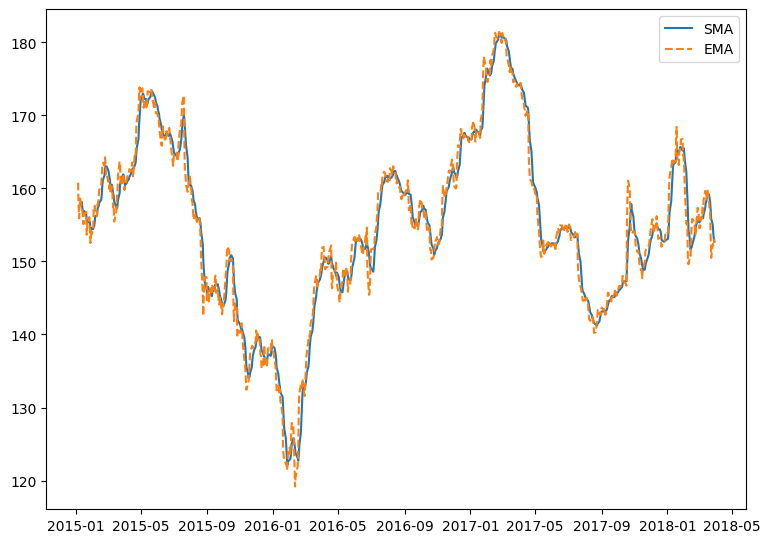

In [ ]:
fig3 = plt.figure(figsize=(7,5),dpi =100)

ax = fig3.add_axes([0,0,1,1])

ax.plot(data.index,data['SMA'] , label="SMA", ls = "-")
ax.plot(data.index,data['EMA'] , label="EMA", ls = '--')
ax.legend()

##MACD

In [ ]:
data['MACD'], data['MACDSIG'], data['MACDHIST'] = ta.MACD(np.asarray(data['Close'])
                                                    , fastperiod = 12, slowperiod = 26,
                                                      signalperiod = 9)

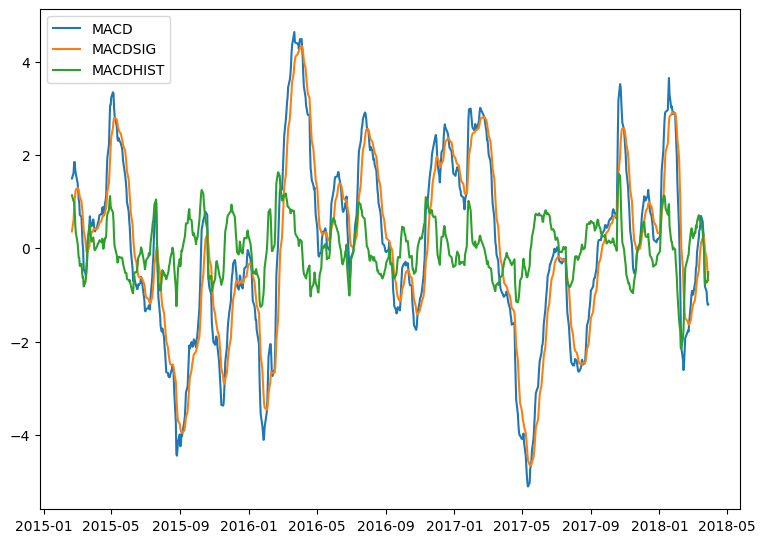

In [ ]:
fig4 = plt.figure(figsize=(7,5),dpi =100)

ax = fig4.add_axes([0,0,1,1])

ax.plot(data.index,data['MACD'] , label="MACD",)
ax.plot(data.index,data['MACDSIG'] , label="MACDSIG")
ax.plot(data.index,data['MACDHIST'] , label="MACDHIST")
ax.legend()

##RSI

In [ ]:
data['RSI'] =  ta.RSI(data['Close'], 5)

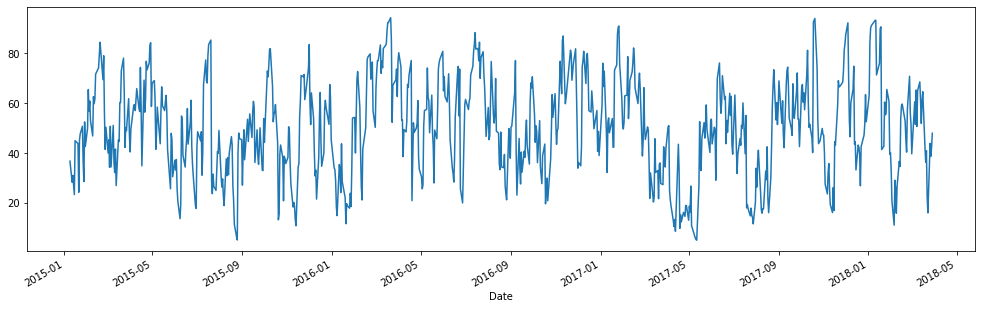

In [ ]:
data['RSI'].plot(kind = 'line', figsize = (17,5))

##Stochastic

In [ ]:
data['slowk'], data['slowd'] = ta.STOCH(data['High'], data['Low'], data['Close'], 
         fastk_period=5, slowk_period=2, 
         slowk_matype=0, slowd_period=3, 
         slowd_matype=0)

In [ ]:
data['fastk'], data['fastd'] = ta.STOCHF(data['High'], data['Low'], data['Close'],
          fastk_period=14, fastd_period=3, 
          fastd_matype=0)

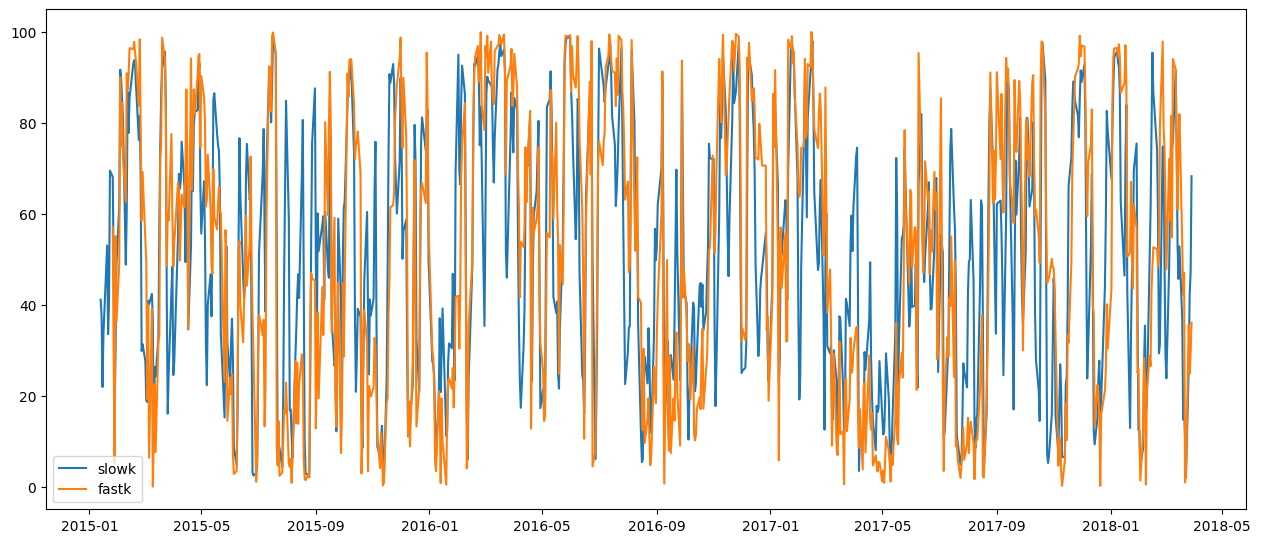

In [ ]:
fig5 = plt.figure(figsize=(12,5),dpi =100)

ax = fig5.add_axes([0,0,1,1])

ax.plot(data.index,data['slowk'] , label="slowk",)
ax.plot(data.index,data['fastk'] , label="fastk")
ax.legend()

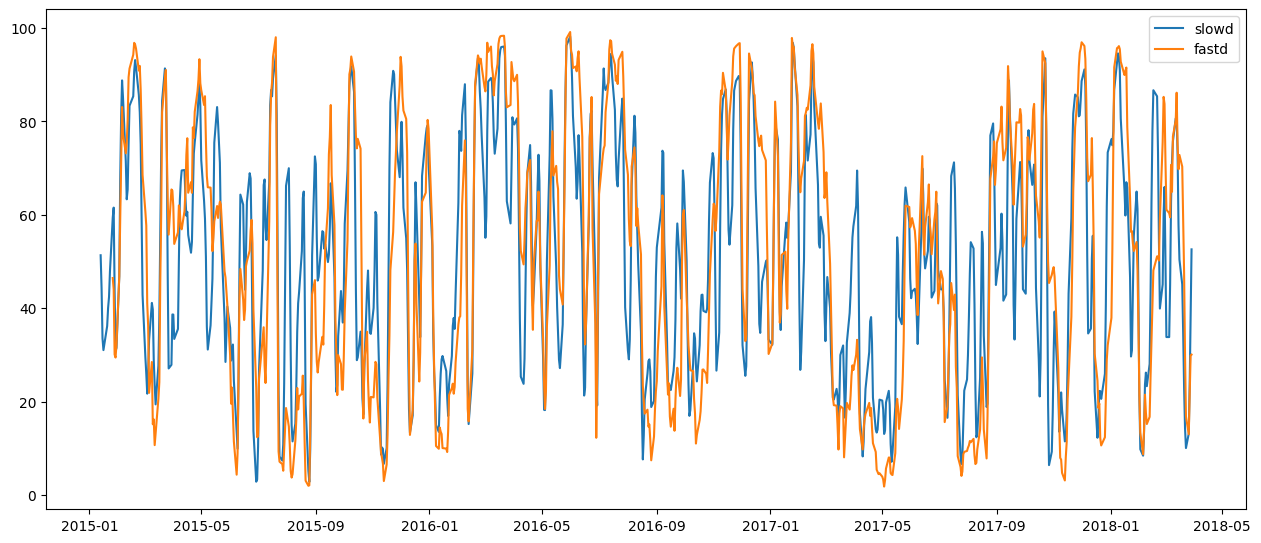

In [ ]:
fig6 = plt.figure(figsize=(12,5),dpi =100)

ax = fig6.add_axes([0,0,1,1])

ax.plot(data.index,data['slowd'] , label="slowd")
ax.plot(data.index,data['fastd'] , label="fastd")
ax.legend()

In [ ]:
data.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Daily_returns     0
upper_band        4
middle_band       4
lower_band        4
SMA               6
EMA               1
MACD             33
MACDSIG          33
MACDHIST         33
RSI               5
slowk             7
slowd             7
fastk            15
fastd            15
dtype: int64

In [ ]:
data.dropna(axis = 0,inplace = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band,SMA,EMA,MACD,MACDSIG,MACDHIST,RSI,slowk,slowd,fastk,fastd
Date,,,,,,,,,,,,,,,,,,,,
2015-02-20,163.639999,164.339996,162.089996,163.649994,131.425018,3353000,-0.001464,165.008650,162.217999,159.427349,161.115714,163.480263,1.494305,0.359572,1.134733,80.852508,88.132886,91.535957,93.528426,95.581244
2015-02-23,164.229996,164.399994,162.500000,162.910004,130.830750,2714400,-0.004522,164.845722,162.720001,160.594280,161.788572,163.100090,1.616230,0.610903,1.005327,69.444063,76.223808,85.675885,83.778232,90.894706
2015-02-24,162.490005,164.990005,161.509995,164.830002,132.372681,4701600,0.011786,165.284534,163.494000,161.703467,162.690000,164.253365,1.846500,0.858023,0.988477,79.037299,81.564270,81.973655,98.385439,91.897366
2015-02-25,164.940002,164.960007,162.580002,162.809998,130.750443,4004600,-0.012255,165.087171,163.617999,162.148828,163.034287,163.291120,1.844728,1.055364,0.789364,55.940292,67.456590,75.081556,78.001954,86.721875
2015-02-26,163.740005,164.139999,159.770004,160.869995,129.192459,7110800,-0.011916,165.598807,163.013999,160.429191,163.021428,161.677037,1.667559,1.177803,0.489756,41.412112,29.832012,59.617624,58.425744,78.271046


In [ ]:
print(data.shape)

(783, 20)


#Normalizing the features

In [ ]:
target = data['Close'].copy()

In [ ]:
target.head()

Date
2015-02-20    163.649994
2015-02-23    162.910004
2015-02-24    164.830002
2015-02-25    162.809998
2015-02-26    160.869995
Name: Close, dtype: float64

In [ ]:
data.drop(labels = 'Close', axis = 1,inplace = True)

Normalize by dividing all the data with the first row except for daily_returns

In [ ]:
# Normalize by dividing all the data with the first row
'''
normalized_columns = ['Open', 'High', "Low", "Adj Close", 
                     "Volume", "SMA", "upper_band",'middle_band',
                      "lower_band",'EMA']

data[normalized_columns] = data[normalized_columns] / data.loc['2015-02-20', normalized_columns].values
data.head()
'''

'\nnormalized_columns = [\'Open\', \'High\', "Low", "Adj Close", \n                     "Volume", "SMA", "upper_band",\'middle_band\',\n                      "lower_band",\'EMA\']\n\ndata[normalized_columns] = data[normalized_columns] / data.loc[\'2015-02-20\', normalized_columns].values\ndata.head()\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
'''
ranged_columns = ['RSI','MACD', 'MACDSIG', 'MACDHIST', 'slowk', 'slowd','fastk', 'fastd']
data[ranged_columns] = scaler.fit_transform(data[ranged_columns])
'''

"\nranged_columns = ['RSI','MACD', 'MACDSIG', 'MACDHIST', 'slowk', 'slowd','fastk', 'fastd']\ndata[ranged_columns] = scaler.fit_transform(data[ranged_columns])\n"

In [ ]:
scale = ['Open', 'High', "Low", "Adj Close", 
          "Volume", "SMA", "upper_band",'middle_band',
          "lower_band",'EMA','RSI','MACD', 'MACDSIG', 
         'MACDHIST', 'slowk', 'slowd','fastk', 'fastd'
          ]

In [ ]:
data[scale] = scaler.fit_transform(data[scale])

In [ ]:
data.head()

,Open,High,Low,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band,SMA,EMA,MACD,MACDSIG,MACDHIST,RSI,slowk,slowd,fastk,fastd
Date,,,,,,,,,,,,,,,,,,,
2015-02-20,0.711048,0.707746,0.705873,0.537428,0.073727,-0.001464,0.700800,0.685600,0.687648,0.660154,0.711909,0.677679,0.558230,0.869613,0.849117,0.888269,0.930168,0.935284,0.963279
2015-02-23,0.720334,0.708696,0.712277,0.527639,0.051930,-0.004522,0.698073,0.693986,0.705342,0.671557,0.705800,0.690191,0.586174,0.835386,0.721578,0.766853,0.868742,0.837782,0.915134
2015-02-24,0.692949,0.718042,0.696813,0.553039,0.119759,0.011786,0.705417,0.706916,0.722161,0.686833,0.724333,0.713820,0.613649,0.830930,0.828824,0.821300,0.829934,0.983854,0.925434
2015-02-25,0.731508,0.717567,0.713527,0.526316,0.095968,-0.012255,0.702114,0.708988,0.728914,0.692667,0.708869,0.713639,0.635591,0.778266,0.570613,0.677469,0.757690,0.780020,0.872267
2015-02-26,0.712622,0.704578,0.669635,0.500651,0.201992,-0.011916,0.710677,0.698897,0.702839,0.692449,0.682931,0.695458,0.649204,0.699023,0.408197,0.293878,0.595595,0.584257,0.785452


In [ ]:
data.to_csv('data.csv')

In [ ]:
from google.colab import files
files.download('data.csv') 

In [ ]:
target.to_csv('target.csv')

In [ ]:
from google.colab import files
files.download('target.csv')

#Train -Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = data.loc['2015-02-20':'2017-12-28'] 
X_test = data.loc['2017-12-29':'2018-03-28']
y_train = target.loc['2015-02-23':'2017-12-29']
y_test = target.loc['2018-01-02':'2018-03-29']


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 19)
(61, 19)
(721,)
(61,)


#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
predictions

array([152.92578125, 154.07421875, 158.2734375 , 161.390625  ,
       162.78125   , 163.6171875 , 163.2734375 , 163.56640625,
       164.2421875 , 162.84765625, 163.96875   , 168.24609375,
       168.44921875, 161.71484375, 162.90625   , 166.20703125,
       165.5390625 , 165.984375  , 167.33203125, 166.4765625 ,
       164.125     , 164.19921875, 162.4921875 , 159.5859375 ,
       155.08984375, 156.71875   , 154.05078125, 149.83984375,
       152.6484375 , 151.796875  , 151.2421875 , 156.0078125 ,
       156.3125    , 155.69140625, 155.44140625, 153.79296875,
       153.578125  , 156.015625  , 159.125     , 156.8828125 ,
       156.5546875 , 154.53125   , 155.1328125 , 157.5703125 ,
       156.1171875 , 158.734375  , 156.6171875 , 159.328125  ,
       160.0859375 , 159.32421875, 158.80078125, 159.42578125,
       159.44921875, 158.1171875 , 157.3515625 , 156.98046875,
       152.6640625 , 150.44140625, 154.6484375 , 152.4921875 ,
       152.98046875])

In [ ]:
y_test

Date
2018-01-02    154.250000
2018-01-03    158.490005
2018-01-04    161.699997
2018-01-05    162.490005
2018-01-08    163.470001
                 ...    
2018-03-23    148.889999
2018-03-26    153.369995
2018-03-27    151.910004
2018-03-28    152.520004
2018-03-29    153.429993
Name: Close, Length: 61, dtype: float64

##Assessing LR-Model

In [ ]:
mean_squared_error(y_test, predictions)

6.098707187194006

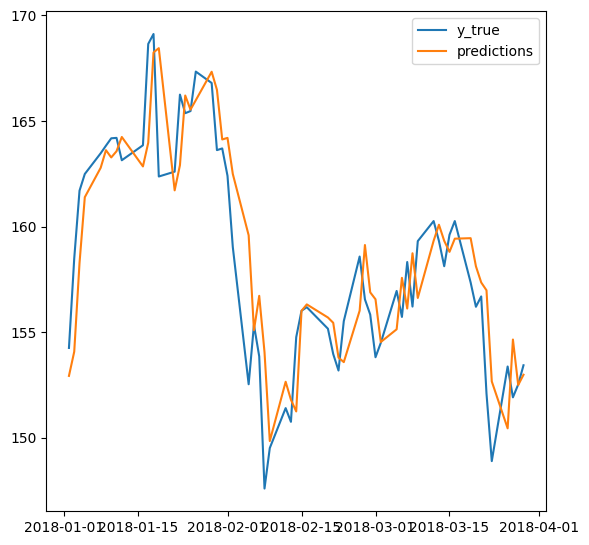

In [ ]:
fig7 = plt.figure(figsize=(5,5),dpi =100)

ax = fig7.add_axes([0,0,1,1])

ax.plot(y_test.index,y_test , label="y_true", ls = "-")
ax.plot(y_test.index,predictions, label="predictions", ls = '-')
ax.legend()

#KNN-Regressor Model

##Hyperparameter Tuning KNN-Model -Elbow Method

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
error_rate = []

for i in range(1,100):
  
  knn = KNeighborsRegressor(n_neighbors=i, algorithm = 'brute')
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(mean_squared_error(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

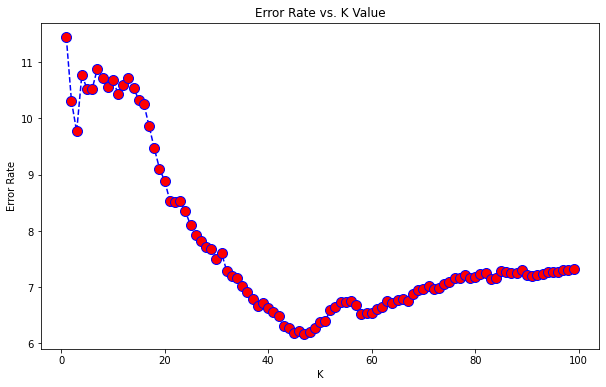

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsRegressor(n_neighbors=45, 
                          #weights = 'distance',
                          algorithm = 'auto' )
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

##Assessing KNN-Model

In [ ]:
mean_squared_error(y_test, pred)

6.184215228746955

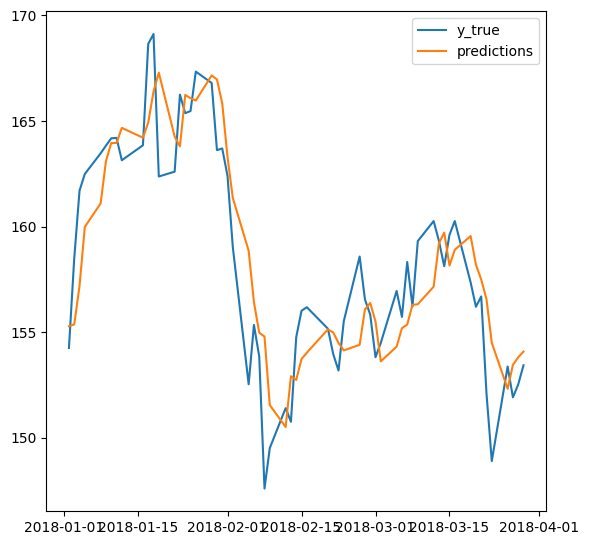

In [ ]:
fig8 = plt.figure(figsize=(5,5),dpi =100)

ax = fig8.add_axes([0,0,1,1])

ax.plot(y_test.index,y_test , label="y_true", ls = "-")
ax.plot(y_test.index,pred, label="predictions", ls = '-')
ax.legend()

#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
X = data.copy()
y = target.copy()

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
train_X = X.loc['2015-02-20':'2017-12-28'] 
test_X = X.loc['2017-12-29':'2018-03-28']
train_y= y.loc['2015-02-23':'2017-12-29']
test_y = y.loc['2018-01-02':'2018-03-29']

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3, learning_rate = 0.005, 
                          max_depth = 10, alpha = 10, n_estimators =1000)

In [ ]:
# Fit the regressor to the training set with fit()
xg_reg.fit(train_X,train_y)

[05:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Make predictions to the test set with predict()
preds = xg_reg.predict(test_X)

##Hyper-parameter tuning

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold
from scipy.stats import randint
#from sklearn.cross_validation import StratifiedKFold

In [ ]:
param_grid = {'min_child_weighth': [1,5],
        'gamma': [1, 1.5, 2],
        'subsample': [0.3,0.7],
        "colsample_bytree" : [0.1,0.3, 0.7],
        'max_depth': [1, 5, 10],
        "eta":[0.005,0.01],
        "n_estimators":[50,75,100]
        }

In [ ]:
params_fixed = {
    "objective":"reg:linear", 
    "alpha":10  
}

In [ ]:
xgb_grid = GridSearchCV(
    estimator= XGBRegressor(params_fixed),
    param_grid = param_grid,
    cv =3,
    scoring = 'neg_root_mean_squared_error',
    verbose = 2,
    n_jobs = -1,
)

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   27.6s


[05:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0,
                                    max_depth={'alpha': 10,
                                               'objective': 'reg:linear'},
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:lin...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.3, 0.7],
                         'eta':

In [ ]:
print ("Best rmse score obtained: {0}".format(xgb_grid.best_score_ * xgb_grid.best_score_ ))
print ("Parameters:")
for key,value in xgb_grid.best_params_.items():
  print ("\t{}:{}".format(key,value))

Best rmse score obtained: 6.976456722743362
Parameters:
	colsample_bytree:0.7
	eta:0.005
	gamma:1
	max_depth:1
	min_child_weighth:1
	n_estimators:100
	subsample:0.7


In [ ]:
xgb_grid_pred =xgb_grid.predict(X_test)

##Assess XGBoost algorithm

In [ ]:
mean_squared_error(test_y, preds)

8.94895033070305

In [ ]:
mean_squared_error(test_y, xgb_grid_pred)

7.204381672819636

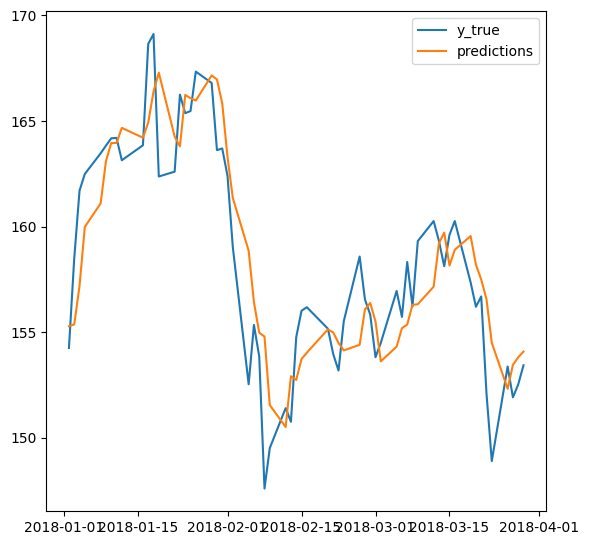

In [ ]:
fig9 = plt.figure(figsize=(5,5),dpi =100)

ax = fig9.add_axes([0,0,1,1])

ax.plot(y_test.index,y_test , label="y_true", ls = "-")
ax.plot(y_test.index,pred, label="predictions", ls = '-')
ax.legend()

#LSTM Model

In [ ]:
data.head()

,Open,High,Low,Adj Close,Volume,Daily_returns,upper_band,middle_band,lower_band,SMA,EMA,MACD,MACDSIG,MACDHIST,RSI,slowk,slowd,fastk,fastd
Date,,,,,,,,,,,,,,,,,,,
2015-02-20,0.711048,0.707746,0.705873,0.537428,0.073727,-0.001464,0.700800,0.685600,0.687648,0.660154,0.711909,0.677679,0.558230,0.869613,0.849117,0.888269,0.930168,0.935284,0.963279
2015-02-23,0.720334,0.708696,0.712277,0.527639,0.051930,-0.004522,0.698073,0.693986,0.705342,0.671557,0.705800,0.690191,0.586174,0.835386,0.721578,0.766853,0.868742,0.837782,0.915134
2015-02-24,0.692949,0.718042,0.696813,0.553039,0.119759,0.011786,0.705417,0.706916,0.722161,0.686833,0.724333,0.713820,0.613649,0.830930,0.828824,0.821300,0.829934,0.983854,0.925434
2015-02-25,0.731508,0.717567,0.713527,0.526316,0.095968,-0.012255,0.702114,0.708988,0.728914,0.692667,0.708869,0.713639,0.635591,0.778266,0.570613,0.677469,0.757690,0.780020,0.872267
2015-02-26,0.712622,0.704578,0.669635,0.500651,0.201992,-0.011916,0.710677,0.698897,0.702839,0.692449,0.682931,0.695458,0.649204,0.699023,0.408197,0.293878,0.595595,0.584257,0.785452


In [ ]:
data.shape

(783, 19)

##Data Preparation

In [ ]:
X_train = data.loc['2015-02-20':'2017-12-28'].copy()
X_test = data.loc['2017-12-29':'2018-03-28'].copy()
y_train = target.loc['2015-02-23':'2017-12-29'].copy()
y_test = target.loc['2018-01-02':'2018-03-29'].copy()

In [ ]:
X_train = np.column_stack((X_train.Open, X_train.High, X_train.Low,
                           X_train['Adj Close'], X_train.Volume,
                           X_train['Daily_returns'],X_train["SMA"],
                           X_train["upper_band"],X_train['middle_band'],
                           X_train["lower_band"],X_train['EMA'],X_train['RSI'],
                           X_train['MACD'],X_train['MACDSIG'], 
                           X_train['MACDHIST'], X_train['slowk'], X_train['slowd'],
                           X_train['fastk'],X_train['fastd']))

X_test = np.column_stack((X_test.Open, X_test.High, X_test.Low,
                           X_test['Adj Close'], X_test.Volume,
                           X_test['Daily_returns'],X_test["SMA"],
                           X_test["upper_band"],X_test['middle_band'],
                           X_test["lower_band"],X_test['EMA'],X_test['RSI'],
                           X_test['MACD'],X_test['MACDSIG'], 
                           X_test['MACDHIST'], X_test['slowk'], X_test['slowd'],
                           X_test['fastk'],X_test['fastd']
                          ))

y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 19)
(61, 19)
(721,)
(61,)


In [ ]:
X_train = X_train.reshape(721,1,19)
X_test = X_test.reshape(61,1,19)

In [ ]:
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
model = Sequential()

model.add(LSTM(75, activation='tanh', return_sequences=True, input_shape=(1, 19)))
model.add(Dropout(0.2))

model.add(LSTM(30, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(64, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(30, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',)

model.fit(X_train,y_train, epochs=500, 
          batch_size = 32, validation_data = (X_test,y_test), 
          verbose=1, shuffle = False)

Train on 721 samples, validate on 61 samples
Epoch 1/500
721/721 [==============================] - 1s 2ms/step - loss: 23966.4405 - val_loss: 25013.6643
Epoch 2/500
721/721 [==============================] - 0s 129us/step - loss: 23806.3786 - val_loss: 24562.9143
Epoch 3/500
721/721 [==============================] - 0s 127us/step - loss: 23026.1730 - val_loss: 23418.3588
Epoch 4/500
721/721 [==============================] - 0s 129us/step - loss: 22074.5943 - val_loss: 22724.2237
Epoch 5/500
721/721 [==============================] - 0s 128us/step - loss: 21545.3592 - val_loss: 22336.1551
Epoch 6/500
721/721 [==============================] - 0s 132us/step - loss: 21213.3526 - val_loss: 22047.0419
Epoch 7/500
721/721 [==============================] - 0s 134us/step - loss: 20947.5791 - val_loss: 21799.6176
Epoch 8/500
721/721 [==============================] - 0s 139us/step - loss: 20714.3738 - val_loss: 21574.7129
Epoch 9/500
721/721 [==============================] - 0s 132us/step 

In [ ]:
model.fit(X_train,y_train, epochs=500, 
          batch_size = 32, validation_data = (X_test,y_test), 
          verbose=1, shuffle = False)

Train on 721 samples, validate on 61 samples
Epoch 1/500
721/721 [==============================] - 0s 142us/step - loss: 230.5380 - val_loss: 23.1104
Epoch 2/500
721/721 [==============================] - 0s 144us/step - loss: 243.7766 - val_loss: 27.1298
Epoch 3/500
721/721 [==============================] - 0s 132us/step - loss: 235.3615 - val_loss: 23.1595
Epoch 4/500
721/721 [==============================] - 0s 140us/step - loss: 250.6970 - val_loss: 26.4682
Epoch 5/500
721/721 [==============================] - 0s 134us/step - loss: 204.0811 - val_loss: 25.1456
Epoch 6/500
721/721 [==============================] - 0s 136us/step - loss: 221.7651 - val_loss: 21.1318
Epoch 7/500
721/721 [==============================] - 0s 133us/step - loss: 261.8098 - val_loss: 22.1147
Epoch 8/500
721/721 [==============================] - 0s 133us/step - loss: 249.7850 - val_loss: 20.7352
Epoch 9/500
721/721 [==============================] - 0s 140us/step - loss: 236.8500 - val_loss: 21.4894
E

##Assessing LSTM Model

In [ ]:
lstm_pred = model.predict(X_test, verbose=1, batch_size = 64)

61/61 [==============================] - 0s 2ms/step


In [ ]:
mean_squared_error(y_test,lstm_pred )

7.300071993978665

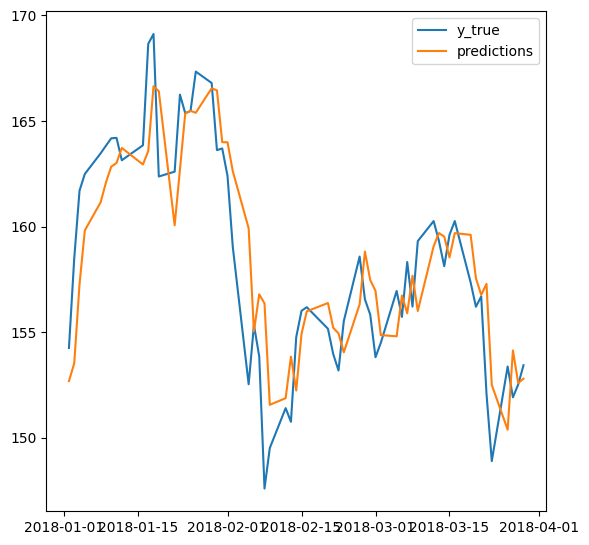

In [ ]:
fig10 = plt.figure(figsize=(5,5),dpi =100)

ax = fig10.add_axes([0,0,1,1])

ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        y_test, label="y_true", ls = "-")
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        lstm_pred, label="predictions", ls = '-',)
ax.legend()

#Combining models

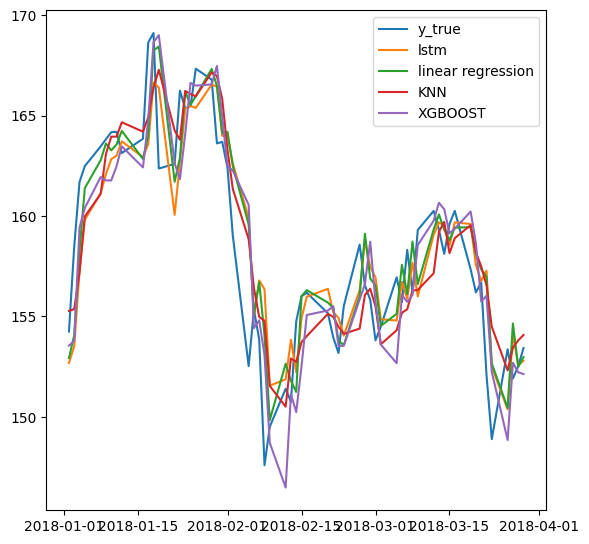

In [ ]:

fig11 = plt.figure(figsize=(5,5),dpi =100)

ax = fig11.add_axes([0,0,1,1])

ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        y_test, label="y_true", ls = "-")
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        lstm_pred, label="lstm", ls = '-',)
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        predictions, label="linear regression", ls = '-',)
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        pred, label="KNN", ls = '-',)
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        xgb_grid_pred, label="XGBOOST", ls = '-',)

ax.legend()

In [ ]:
lstm = np.array(lstm_pred)
lstm = lstm.reshape(61)

In [ ]:
index = target.loc['2018-01-02':'2018-03-29'].index

In [ ]:
mean_model = pd.DataFrame(data = ({'LR': predictions,
                      "KNN": pred,
                      "XGBoost": xgb_grid_pred,
                      "LSTM": lstm
                        }), index = index
             )
mean_model.head()

,LR,KNN,XGBoost,LSTM
Date,,,,
2018-01-02,152.925781,155.278445,153.550827,152.680130
2018-01-03,154.074219,155.367778,153.776535,153.524246
2018-01-04,158.273438,157.185334,159.426529,157.263916
2018-01-05,161.390625,159.981334,160.403717,159.813095
2018-01-08,162.781250,161.098000,161.947250,161.153366


In [ ]:
mean_model['final'] = mean_model.mean(axis = 1)
mean_model.head()

,LR,KNN,XGBoost,LSTM,final
Date,,,,,
2018-01-02,152.925781,155.278445,153.550827,152.680130,153.608796
2018-01-03,154.074219,155.367778,153.776535,153.524246,154.185695
2018-01-04,158.273438,157.185334,159.426529,157.263916,158.037304
2018-01-05,161.390625,159.981334,160.403717,159.813095,160.397193
2018-01-08,162.781250,161.098000,161.947250,161.153366,161.744967


##Assessing Average Model

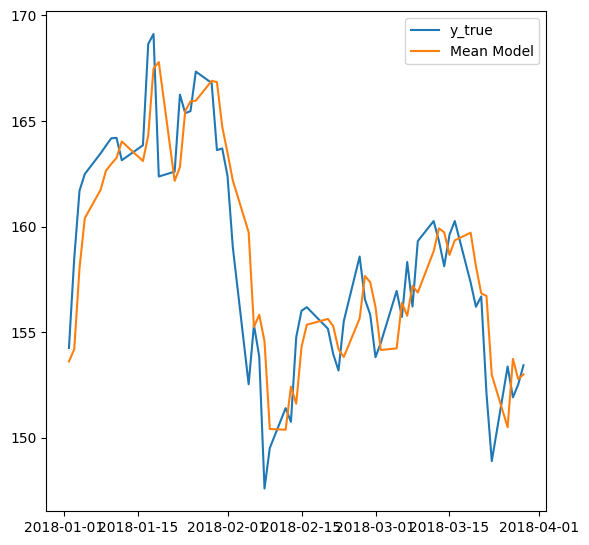

In [ ]:
fig12 = plt.figure(figsize=(5,5),dpi =100)

ax = fig12.add_axes([0,0,1,1])

ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        y_test, label="y_true", ls = "-")
ax.plot(target.loc['2018-01-02':'2018-03-29'].index,
        mean_model['final'], label="Mean Model", ls = '-',)
ax.legend()

In [ ]:
mean_squared_error(y_test,mean_model['final'] )

5.999826249683446